In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [59]:
#MILSTRONG Test strong convergence of Milstein
#Solves   dX = r*X*(K-X) dt + beta*X dW,  X(0) = Xzero,


np.random.seed(100)
#var declaration
r=2 
K=1 
beta=0.25 
Xzero=0.5
T=1 
N=2**11 
dt=float(T)/N
M=500
R = np.array([1, 16, 32,64, 128])# milstein step size
dW = np.sqrt(dt)*np.random.randn(M,N) #brownian increments
Xmil = np.zeros((M,5)) 


In [54]:
for p in range(5):
    Dt=R[p]*dt;
    L=float(N)/R[p]
    Xtemp=Xzero*np.ones(M)
    for j in range (1, int(L)+1):
        Winc=np.sum(dW[:,range(R[p]*(j-1), R[p]*j)], axis=1) #range(start, stop, step)
        
        #axis : axis along which we want to calculate the sum value. Otherwise, 
        #it will consider arr to be flattened(works on all the axis). 
        #axis = 0 means along the column and axis = 1 means working along the row.
        
        Xtemp = Xtemp+ Dt*r*Xtemp*(K-Xtemp) + beta*Xtemp*Winc+ 0.5*beta**2*Xtemp*(np.power(Winc,2)-Dt)
    
    Xmil[:,p]=Xtemp
Xmil


array([[0.83673546, 0.83662473, 0.83663867, 0.83882946, 0.84272145],
       [0.98862578, 0.98906155, 0.99121461, 0.9932772 , 0.99912868],
       [0.69235601, 0.69291534, 0.69304787, 0.69358885, 0.69608568],
       ...,
       [1.0509024 , 1.05185614, 1.05057729, 1.05165516, 1.04733572],
       [0.86605925, 0.86642612, 0.86832474, 0.86855741, 0.87532846],
       [0.68309825, 0.68364719, 0.68475779, 0.68650069, 0.69179502]])

In [55]:
    Xref=Xmil[:,0]
    Xerr=np.abs(Xmil[:, range(1,5)]-np.tile(Xref, [4,1]).T)
    #np.tile: Construct an array by repeating 
    #A number of times givern by reps
    Xerr

array([[1.10733556e-04, 9.67948418e-05, 2.09399322e-03, 5.98598570e-03],
       [4.35771468e-04, 2.58883021e-03, 4.65142809e-03, 1.05029085e-02],
       [5.59329219e-04, 6.91853939e-04, 1.23283394e-03, 3.72967212e-03],
       ...,
       [9.53736858e-04, 3.25116007e-04, 7.52753867e-04, 3.56668592e-03],
       [3.66870740e-04, 2.26548420e-03, 2.49815454e-03, 9.26920860e-03],
       [5.48939632e-04, 1.65953694e-03, 3.40243725e-03, 8.69676514e-03]])

In [56]:
np.mean(Xerr)
#mean error

0.0028912608321020896

In [57]:
Dtvals=dt*R[1:5]
Dtvals

array([0.0078125, 0.015625 , 0.03125  , 0.0625   ])

Text(0.5, 1.0, 'milstein')

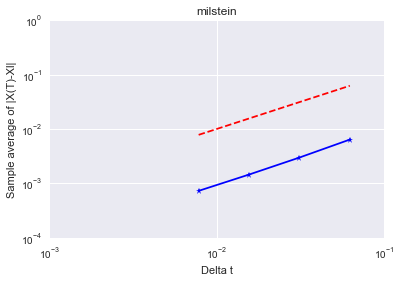

In [58]:
plt.loglog(Dtvals,np.mean(Xerr,0),'b*-')
plt.loglog(Dtvals,Dtvals,'r--')
plt.axis([1e-3, 1e-1, 1e-4, 1])
#plt.xlabel('Delta t'); plt.ylabel('Sample average of |X(T)-Xl|')
plt.title('Milstein')